## Decision Trees vs Random Forests: Heart Disease Classification

This notebook demonstrates how to use Decision Tree and Random Forest models for classification using the `heart.csv` dataset.

### 1. Import Required Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from io import StringIO
import graphviz
import warnings
warnings.filterwarnings('ignore')

### 2. Load and Explore the Dataset

In [12]:
# Load the dataset
heart = pd.read_csv('heart.csv')

# Display the first 5 rows
print('First 5 rows:')
display(heart.head())

# Check for missing values
print('\nMissing values:')
display(heart.isnull().sum())

# Show basic statistics
print('\nDataset statistics:')
display(heart.describe())

First 5 rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0



Missing values:


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


Dataset statistics:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### 3. Preprocess the Data

In [13]:
# Check data types and unique values for possible categorical encoding
print('Unique values per column:')
display(heart.nunique())

# For this dataset, most features are already numeric. If needed, encode categorical columns here.
# Example: if 'sex', 'cp', etc. are categorical, but they are already encoded as numbers.

# Split features and target
y = heart['target']
X = heart.drop('target', axis=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Unique values per column:


age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

Train shape: (820, 13), Test shape: (205, 13)


### 4. Train a Decision Tree Classifier

Decision Tree Test Accuracy: 0.985

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       100
           1       1.00      0.97      0.99       105

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



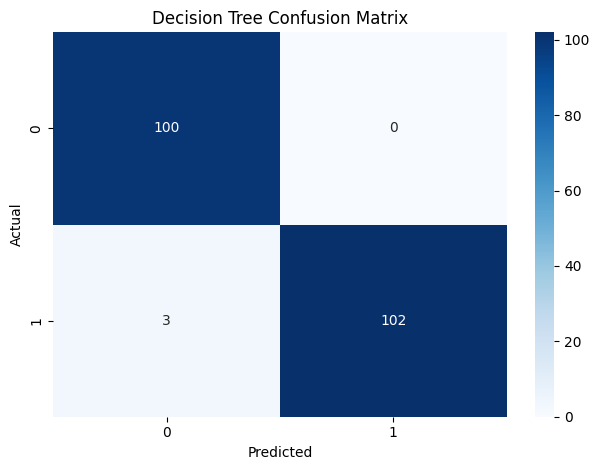

In [14]:
# Train a Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

y_pred_dt = dt_clf.predict(X_test)

# Evaluate
acc_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Test Accuracy: {acc_dt:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('images/decision_tree_confusion_matrix.png')
plt.show()

### 5. Visualize the Decision Tree

In [15]:
# Visualize the trained Decision Tree
feature_names = X.columns
class_names = ['No Disease', 'Disease']
dot_data = StringIO()
export_graphviz(dt_clf, out_file=dot_data, feature_names=feature_names, class_names=class_names,
                filled=True, rounded=True, special_characters=True, max_depth=3)
try:
    import os
    graph = graphviz.Source(dot_data.getvalue())
    graph.format = 'png'
    graph.render('images/decision_tree', view=False, cleanup=True)
    print("Decision tree visualization saved as 'images/decision_tree.png'.")
    display(graph)
except Exception:
    print("Graphviz system executables not found. The tree will be saved as 'images/decision_tree.dot'.")
    with open('images/decision_tree.dot', 'w') as f:
        f.write(dot_data.getvalue())
    print("DOT file saved as 'images/decision_tree.dot'. You can visualize it using an online tool or Graphviz app.")

Graphviz system executables not found. The tree will be saved as 'images/decision_tree.dot'.
DOT file saved as 'images/decision_tree.dot'. You can visualize it using an online tool or Graphviz app.


### 6. Analyze Overfitting and Control Tree Depth

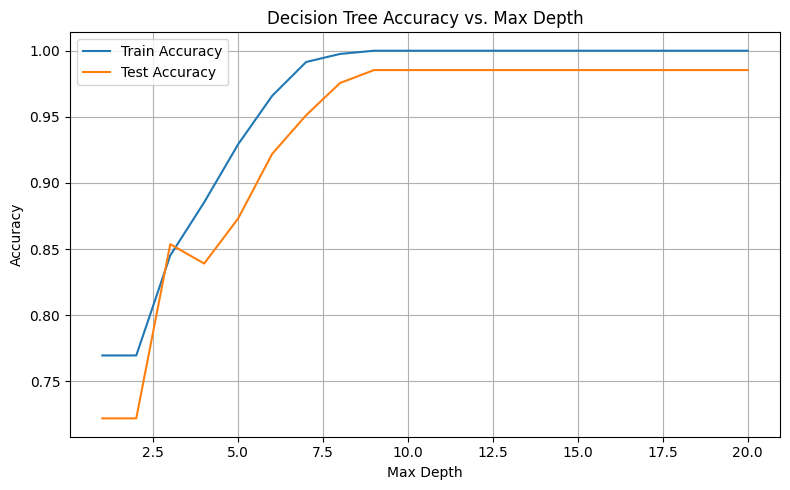

Overfitting is indicated by high train accuracy and much lower test accuracy at higher depths.


In [16]:
# Analyze overfitting by varying max_depth
train_acc = []
test_acc = []
depths = range(1, 21)

for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)
    train_acc.append(clf.score(X_train, y_train))
    test_acc.append(clf.score(X_test, y_test))

plt.figure(figsize=(8,5))
plt.plot(depths, train_acc, label='Train Accuracy')
plt.plot(depths, test_acc, label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs. Max Depth')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('images/decision_tree_depth_vs_accuracy.png')
plt.show()

print("Overfitting is indicated by high train accuracy and much lower test accuracy at higher depths.")

### 7. Train a Random Forest Classifier

Random Forest Test Accuracy: 1.000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



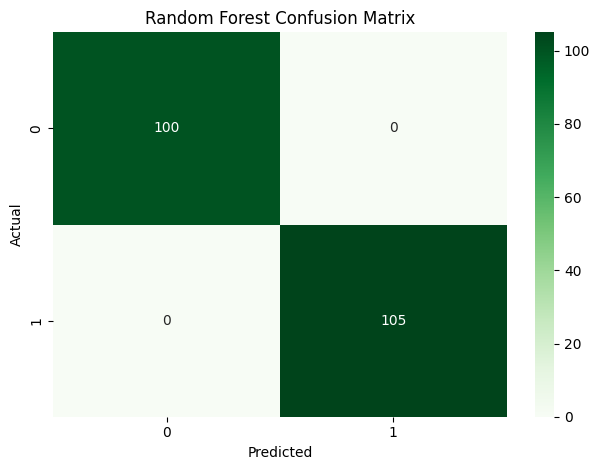

In [17]:
# Train a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)

# Evaluate
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Test Accuracy: {acc_rf:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure()
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('images/random_forest_confusion_matrix.png')
plt.show()

### 8. Compare Model Accuracies

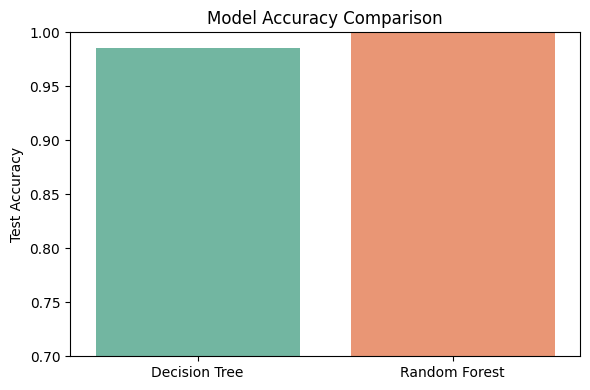

Decision Tree Accuracy: 0.985
Random Forest Accuracy: 1.000


In [18]:
# Compare model accuracies
models = ['Decision Tree', 'Random Forest']
accuracies = [acc_dt, acc_rf]

plt.figure(figsize=(6,4))
sns.barplot(x=models, y=accuracies, palette='Set2')
plt.ylim(0.7, 1.0)
plt.ylabel('Test Accuracy')
plt.title('Model Accuracy Comparison')
plt.tight_layout()
plt.savefig('images/model_accuracy_comparison.png')
plt.show()

print(f"Decision Tree Accuracy: {acc_dt:.3f}")
print(f"Random Forest Accuracy: {acc_rf:.3f}")

### 9. Interpret Feature Importances

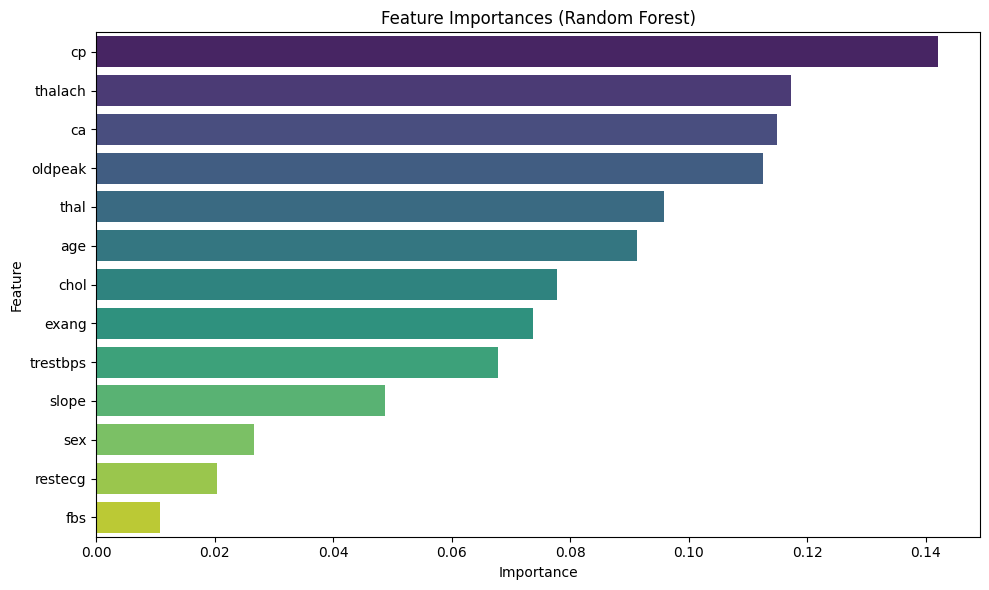

cp: 0.142
thalach: 0.117
ca: 0.115
oldpeak: 0.113
thal: 0.096
age: 0.091
chol: 0.078
exang: 0.074
trestbps: 0.068
slope: 0.049
sex: 0.027
restecg: 0.020
fbs: 0.011


In [19]:
# Feature importances from Random Forest
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=X.columns[indices], palette='viridis')
plt.title('Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('images/random_forest_feature_importances.png')
plt.show()

# Show top features
for i in range(len(indices)):
    print(f"{X.columns[indices[i]]}: {importances[indices[i]]:.3f}")

### 10. Evaluate Models Using Cross-Validation

Decision Tree CV Accuracy: 1.000 ± 0.000
Random Forest CV Accuracy: 0.997 ± 0.006


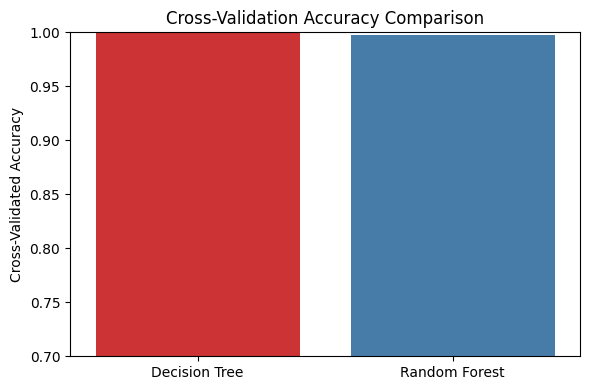

In [20]:
# Cross-validation for both models
from sklearn.model_selection import cross_val_score

cv_scores_dt = cross_val_score(dt_clf, X, y, cv=5)
cv_scores_rf = cross_val_score(rf_clf, X, y, cv=5)

print(f"Decision Tree CV Accuracy: {cv_scores_dt.mean():.3f} ± {cv_scores_dt.std():.3f}")
print(f"Random Forest CV Accuracy: {cv_scores_rf.mean():.3f} ± {cv_scores_rf.std():.3f}")

plt.figure(figsize=(6,4))
sns.barplot(x=['Decision Tree', 'Random Forest'], y=[cv_scores_dt.mean(), cv_scores_rf.mean()], palette='Set1')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Cross-Validation Accuracy Comparison')
plt.ylim(0.7, 1.0)
plt.tight_layout()
plt.savefig('images/cross_validation_accuracy_comparison.png')
plt.show()